# Bellabeat Wellness Tracker Analysis

This project is being done as part of the Google Data Analytics capstone project. It serves as an example of the skills that have been learned during the entire course.

During this project data will be collected, prepared, processed and analyzed. Visualizations will be created, conclusions from the data will be determined and insights will be presented to potential stakeholders.

## Background

Bellabeat is a fitness tracker company marketed towards women. These fitness trackers collect a large amount of data, which it is believed can be used to assist in a new marketing strategy.

We are being tasked to analyze data from these fitness trackers, and determine the following:

* What trends exist in smart device usage?
* How can these trends apply to Bellabeat customers?
* How can these trends influence Bellabeat's marketing strategy?

## Data Preparation

The data for this exercise come from [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit), a dataset available on Kaggle which contains data from 30 Fitbit users.

The documentation for what exactly each column in the dataset means can be found [here](https://www.fitabase.com/media/1930/fitabasedatadictionary102320.pdf)

The data for this dataset was obtained by consenting users and is available freely under the public domain.

This data is believed to be credible and contain no bias.

The data sources that we will be looking at will be:

* **minuteStepsNarrow_merged.csv**: The number of steps moved on a minute by minute basis.

* **minuteCaloriesNarrow_merged.csv**: The estimated number of calories expended on a minute by minute basis.

* **heartrate_seconds_merged.csv**: The heart rate measured at a given time.

* **minuteIntensitiesNarrow_merged.csv**: The intensity level on a minute by minute basis.

* **minuteMETsNarrow_merged.csv**: The [Metabolic equivalent](https://www.kaggle.com/datasets/arashnic/fitbit/discussion/254740) on a minute by minute basis.

* **minuteSleep_merged.csv**: The sleep state of a person on a minute by minute basis.

* **weightLogInfo_merged.csv**: The weight of a person on a given day.

## Data Processing

For this exercise, Python will be used to process the data. It has a wide range of tools for working with and validating datasets (`Pandas`) and creating visualizations (`Seaborn`).

In [73]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Validating  & Processing Data

Data validation will be done on each dataset. This process will involve checking to see if any values contain null values or any other outliers (negative values where there shouldn't be, invalid dates, etc)

Data processing will involve applying named categories to columns where it is needed and formatting dates and times so the data can be organized more clearly.

In [74]:
def format_datetime(df, datetime_col="ActivityMinute"):
    return pd.to_datetime(df[datetime_col], format=r"%m/%d/%Y %I:%M:%S %p")

In [75]:
def get_date(df, datetime_col="ActivityMinute"):
    date_series = df[datetime_col].apply(lambda x: x.date())
    return date_series

In [76]:
def calc_day_of_week(df, datetime_col="ActivityMinute"):
    day_categories = [
        "Mon",
        "Tue",
        "Wed",
        "Thu",
        "Fri",
        "Sat",
        "Sun"
    ]
    day_of_week_series = df[datetime_col].apply(lambda x: x.strftime("%a"))
    day_of_week_series = pd.Categorical(day_of_week_series, categories=day_categories)
    return day_of_week_series

In [77]:
def calc_time_of_day(df, datetime_col="ActivityMinute"):
    time_categories = [
        "Morning",
        "Afternoon",
        "Evening",
        "Night"
    ]
    def time_of_day(hour):
        if hour in range(0,6):
            return "Night"
        if hour in range(6, 12):
            return "Morning"
        if hour in range(12,18):
            return "Afternoon"
        if hour in range(18, 24):
            return "Evening"
        raise ValueError(f"Could not convert hour '{hour}' to time of day")
    time_of_day_series = df[datetime_col].apply(lambda x: time_of_day(x.hour))
    time_of_day_series = pd.Categorical(time_of_day_series, categories=time_categories)
    return time_of_day_series

#### Steps

In [78]:
steps = pd.read_csv(r"./data/minuteStepsNarrow_merged.csv")
steps['ActivityMinute'] = format_datetime(steps)
steps['day_of_week'] = calc_day_of_week(steps)
steps['time_of_day'] = calc_time_of_day(steps)
steps['date'] = get_date(steps)
steps.head()

,Id,ActivityMinute,Steps,day_of_week,time_of_day,date
0,1503960366,2016-04-12 00:00:00,0,Tue,Night,2016-04-12
1,1503960366,2016-04-12 00:01:00,0,Tue,Night,2016-04-12
2,1503960366,2016-04-12 00:02:00,0,Tue,Night,2016-04-12
3,1503960366,2016-04-12 00:03:00,0,Tue,Night,2016-04-12
4,1503960366,2016-04-12 00:04:00,0,Tue,Night,2016-04-12


In [79]:
steps.isna().sum()

Id                0
ActivityMinute    0
Steps             0
day_of_week       0
time_of_day       0
date              0
dtype: int64

In [80]:
steps['ActivityMinute'].min()

Timestamp('2016-04-12 00:00:00')

In [81]:
steps['ActivityMinute'].max()

Timestamp('2016-05-12 15:59:00')

In [82]:
steps['Steps'].min()

0

In [83]:
steps['Steps'].max()

220

In [84]:
print(f"The number of users in this dataset is: {len(set(steps['Id']))}")

The number of users in this dataset is: 33


Step data appears valid:

* No rows contain null values
* `ActivityMinute` contains valid values
* `Steps` contains no negative values 

#### Calories

In [85]:
calories = pd.read_csv(r"./data/minuteCaloriesNarrow_merged.csv")
calories['ActivityMinute'] = format_datetime(calories)
calories['day_of_week'] = calc_day_of_week(calories)
calories['time_of_day'] = calc_time_of_day(calories)
calories['date'] = get_date(calories)
calories.head()

,Id,ActivityMinute,Calories,day_of_week,time_of_day,date
0,1503960366,2016-04-12 00:00:00,0.7865,Tue,Night,2016-04-12
1,1503960366,2016-04-12 00:01:00,0.7865,Tue,Night,2016-04-12
2,1503960366,2016-04-12 00:02:00,0.7865,Tue,Night,2016-04-12
3,1503960366,2016-04-12 00:03:00,0.7865,Tue,Night,2016-04-12
4,1503960366,2016-04-12 00:04:00,0.7865,Tue,Night,2016-04-12


In [86]:
calories.isna().sum()

Id                0
ActivityMinute    0
Calories          0
day_of_week       0
time_of_day       0
date              0
dtype: int64

In [87]:
calories['ActivityMinute'].min()

Timestamp('2016-04-12 00:00:00')

In [88]:
calories['ActivityMinute'].max()

Timestamp('2016-05-12 15:59:00')

In [89]:
calories['Calories'].min()

0.0

In [90]:
calories['Calories'].max()

19.7499465942383

In [91]:
print(f"The number of users in this dataset is: {len(set(calories['Id']))}")

The number of users in this dataset is: 33


Calorie data appears valid:

* No rows contain null values
* `ActivityMinute` contains reasonable values
* `Calories` contains no negative values

#### Heart Rate

In [92]:
heart_rate = pd.read_csv(r"./data/heartrate_seconds_merged.csv")
heart_rate['Time'] = format_datetime(heart_rate, datetime_col="Time")
heart_rate['day_of_week'] = calc_day_of_week(heart_rate, datetime_col="Time")
heart_rate['time_of_day'] = calc_time_of_day(heart_rate, datetime_col="Time")
heart_rate['date'] = get_date(heart_rate, datetime_col='Time')
heart_rate.head()

,Id,Time,Value,day_of_week,time_of_day,date
0,2022484408,2016-04-12 07:21:00,97,Tue,Morning,2016-04-12
1,2022484408,2016-04-12 07:21:05,102,Tue,Morning,2016-04-12
2,2022484408,2016-04-12 07:21:10,105,Tue,Morning,2016-04-12
3,2022484408,2016-04-12 07:21:20,103,Tue,Morning,2016-04-12
4,2022484408,2016-04-12 07:21:25,101,Tue,Morning,2016-04-12


In [93]:
heart_rate.isna().sum()

Id             0
Time           0
Value          0
day_of_week    0
time_of_day    0
date           0
dtype: int64

In [94]:
heart_rate['Time'].min()

Timestamp('2016-04-12 00:00:00')

In [95]:
heart_rate['Time'].max()

Timestamp('2016-05-12 16:20:00')

In [96]:
heart_rate['Value'].min()

36

In [97]:
heart_rate['Value'].max()

203

In [98]:
print(f"The number of users in this dataset is: {len(set(heart_rate['Id']))}")

The number of users in this dataset is: 14


Heart Rate data appears valid:

* No rows contain null values.
* `Time` data appears valid.
* `Value` contains no zero or lower numbers.

*The max and min values for* `Value` *are both high and low for exercise and sleep, but not outside of reasonability*

#### Intensity

In [99]:
intensity = pd.read_csv(r"./data/minuteIntensitiesNarrow_merged.csv")
intensity_map = {
    0: 'Sedentary',
    1: 'Light',
    2: 'Moderate',
    3: 'Very Active' 
}

intensity['intensity_name'] = intensity['Intensity'].map(intensity_map)
intensity['intensity_name'] = intensity['intensity_name'].astype("category")
intensity['ActivityMinute'] = format_datetime(intensity)
intensity['day_of_week'] = calc_day_of_week(intensity)
intensity['time_of_day'] = calc_time_of_day(intensity)
intensity['date'] = get_date(intensity)
intensity.head()

,Id,ActivityMinute,Intensity,intensity_name,day_of_week,time_of_day,date
0,1503960366,2016-04-12 00:00:00,0,Sedentary,Tue,Night,2016-04-12
1,1503960366,2016-04-12 00:01:00,0,Sedentary,Tue,Night,2016-04-12
2,1503960366,2016-04-12 00:02:00,0,Sedentary,Tue,Night,2016-04-12
3,1503960366,2016-04-12 00:03:00,0,Sedentary,Tue,Night,2016-04-12
4,1503960366,2016-04-12 00:04:00,0,Sedentary,Tue,Night,2016-04-12


In [100]:
intensity.isna().sum()

Id                0
ActivityMinute    0
Intensity         0
intensity_name    0
day_of_week       0
time_of_day       0
date              0
dtype: int64

In [101]:
intensity['ActivityMinute'].min()

Timestamp('2016-04-12 00:00:00')

In [102]:
intensity['ActivityMinute'].max()

Timestamp('2016-05-12 15:59:00')

In [103]:
intensity['Intensity'].min()

0

In [104]:
intensity['Intensity'].max()

3

*Note that according to [the documentation](https://www.fitabase.com/media/1930/fitabasedatadictionary102320.pdf) the values for intensity range from 0 - 3*

In [105]:
print(f"The number of users in this dataset is: {len(set(intensity['Id']))}")

The number of users in this dataset is: 33


The Intensity data appears valid:

* No rows contain null values.
* `ActivityMinute` values appear valid.
* `Intensity` values exist within the valid range.

#### METs

In [106]:
mets = pd.read_csv(r"./data/minuteMETsNarrow_merged.csv")
mets['ActivityMinute'] = format_datetime(mets)
mets['day_of_week'] = calc_day_of_week(mets)
mets['time_of_day'] = calc_time_of_day(mets)
mets['date'] = get_date(mets)
mets.head()

,Id,ActivityMinute,METs,day_of_week,time_of_day,date
0,1503960366,2016-04-12 00:00:00,10,Tue,Night,2016-04-12
1,1503960366,2016-04-12 00:01:00,10,Tue,Night,2016-04-12
2,1503960366,2016-04-12 00:02:00,10,Tue,Night,2016-04-12
3,1503960366,2016-04-12 00:03:00,10,Tue,Night,2016-04-12
4,1503960366,2016-04-12 00:04:00,10,Tue,Night,2016-04-12


*Note that according to [this source](https://www.kaggle.com/datasets/arashnic/fitbit/discussion/254740) true METs values need to be divided by 10*

In [107]:
mets['true_mets'] = (mets['METs']/10)
mets.head()

,Id,ActivityMinute,METs,day_of_week,time_of_day,date,true_mets
0,1503960366,2016-04-12 00:00:00,10,Tue,Night,2016-04-12,1.0
1,1503960366,2016-04-12 00:01:00,10,Tue,Night,2016-04-12,1.0
2,1503960366,2016-04-12 00:02:00,10,Tue,Night,2016-04-12,1.0
3,1503960366,2016-04-12 00:03:00,10,Tue,Night,2016-04-12,1.0
4,1503960366,2016-04-12 00:04:00,10,Tue,Night,2016-04-12,1.0


In [108]:
mets.isna().sum()

Id                0
ActivityMinute    0
METs              0
day_of_week       0
time_of_day       0
date              0
true_mets         0
dtype: int64

In [109]:
mets['ActivityMinute'].min()

Timestamp('2016-04-12 00:00:00')

In [110]:
mets['ActivityMinute'].max()

Timestamp('2016-05-12 15:59:00')

In [111]:
mets['true_mets'].min()

0.0

In [112]:
print(f"Rows with invalid true_mets values: = {mets.query('true_mets < 1').shape[0]}")

Rows with invalid true_mets values: = 8


In [113]:
mets = mets.query("true_mets >= 1")

In [114]:
mets['true_mets'].min()

1.0

In [115]:
print(f"Rows with invalid true_mets values: = {mets.query('true_mets < 1').shape[0]}")

Rows with invalid true_mets values: = 0


In [116]:
mets['true_mets'].max()

15.7

In [117]:
print(f"The number of users in this dataset is: {len(set(mets['Id']))}")

The number of users in this dataset is: 33


Errors were found in the METs data. 8 rows were discovered with `true_mets` values less than `1`. Since the METs at rest should be `1` these entries were considered erroneous and were removed.

After these values were removed, the rest of the data appeared fine:

* No rows contained null values.
* `ActivityMinute` values were all vaild.
* After cleaning, `true_mets` values were all acceptable.

*A METs value of 15 is high, however jump rope as an activity has a METs value of 12, so it is not outside the realm of possibility*.

#### Sleep

In [118]:
sleep = pd.read_csv(r"./data/minuteSleep_merged.csv")
sleep_map = {
    1: "asleep",
    2: "restless",
    3: "awake"
}
sleep['type'] = sleep["value"].map(sleep_map)
sleep['type'] = sleep['type'].astype("category")
sleep = sleep.rename(columns={"date":"datetime"})
sleep['datetime'] = format_datetime(sleep, datetime_col="datetime")
sleep['day_of_week'] = calc_day_of_week(sleep, datetime_col="datetime")
sleep['time_of_day'] = calc_time_of_day(sleep, datetime_col="datetime")
sleep['date'] = get_date(sleep, datetime_col="datetime")
sleep.head()

,Id,datetime,value,logId,type,day_of_week,time_of_day,date
0,1503960366,2016-04-12 02:47:30,3,11380564589,awake,Tue,Night,2016-04-12
1,1503960366,2016-04-12 02:48:30,2,11380564589,restless,Tue,Night,2016-04-12
2,1503960366,2016-04-12 02:49:30,1,11380564589,asleep,Tue,Night,2016-04-12
3,1503960366,2016-04-12 02:50:30,1,11380564589,asleep,Tue,Night,2016-04-12
4,1503960366,2016-04-12 02:51:30,1,11380564589,asleep,Tue,Night,2016-04-12


In [119]:
sleep.isna().sum()

Id             0
datetime       0
value          0
logId          0
type           0
day_of_week    0
time_of_day    0
date           0
dtype: int64

In [120]:
sleep['datetime'].min()

Timestamp('2016-04-11 20:48:00')

In [121]:
sleep['datetime'].max()

Timestamp('2016-05-12 09:56:00')

In [122]:
sleep['value'].min()

1

In [123]:
sleep['value'].max()

3

*Note that [the documentation](https://www.fitabase.com/media/1930/fitabasedatadictionary102320.pdf) describes what each `value` represents*

In [124]:
print(f"The number of users in this dataset is: {len(set(sleep['Id']))}")

The number of users in this dataset is: 24


The sleep data appears valid:

* No rows contain null values.
* `date` contains valid values.
* `value` contains values within acceptable range.

#### Weight

In [125]:
def body_type(bmi):
    if bmi < 18.5:
        return "underweight"
    elif bmi >= 18.5 and bmi < 25:
        return "normal"
    elif bmi >= 25 and bmi < 30:
        return "overweight"
    elif bmi >= 30 and bmi < 40:
        return "obese"
    else:
        return "extremely_obese"

weight = pd.read_csv(r"./data/weightLogInfo_merged.csv")
weight['body_type'] = weight['BMI'].apply(body_type)
weight['body_type'] = weight['body_type'].astype("category")
weight = weight.rename(columns={"Date":"Datetime"})
weight.head()

,Id,Datetime,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,body_type
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000,normal
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000,normal
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000,extremely_obese
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000,normal
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000,normal


The parameters to assign a `body_type` to a `bmi` from [here](https://www.builtlean.com/bmi-chart/)

In [126]:
weight.isna().sum()

Id                 0
Datetime           0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
body_type          0
dtype: int64

In [127]:
print(f"Number of entries in this dataset are: {weight.shape[0]}")

Number of entries in this dataset are: 67


Null values exist in `Fat` column of our dataset. And since 65 of the 67 rows are null, there is no point in keeping that column in our analysis.

In [128]:
weight = weight.drop(['Fat'], axis=1)
weight.isna().sum()

Id                0
Datetime          0
WeightKg          0
WeightPounds      0
BMI               0
IsManualReport    0
LogId             0
body_type         0
dtype: int64

In [130]:
weight['Datetime'].min()

'4/12/2016 11:59:59 PM'

In [132]:
weight['Datetime'].max()

'5/9/2016 6:39:44 AM'

In [133]:
weight['WeightPounds'].min()

115.963146545323

In [134]:
weight['WeightPounds'].max()

294.317120016975

In [135]:
weight['BMI'].min()

21.4500007629395

In [136]:
weight['BMI'].max()

47.5400009155273

In [137]:
print(f"The number of users in this dataset is: {len(set(weight['Id']))}")

The number of users in this dataset is: 8


The weight data appears valid:

* Null values were found in most entries of the `Fat` column, so that column was dropped. No other Null values were found.

* All `Date` values are valid.

* The `WeightPounds` data contains reasonable values; nothing too low or too high. We will not be using `WeightKg` in our analysis.

* The `BMI` values are valid.

## Analysis

### Activity Level by BMI

The assumption that we will be looking to be made is that users with lower BMI exercise more. They will have more steps, have fewer sedentary moments, more moderate or very active moments, and will have higher METs rates. We will also examine how good their sleep is and their heart rate.

We will start off by looking at our `weights` dataset and see how many `body_type` groups there are.

In [138]:
print("The different body types in our weight dataset are:")
for body_type in set(weight['body_type']):
    print(f"   * {body_type}")

The different body types in our weight dataset are:
   * extremely_obese
   * overweight
   * normal


In [139]:
normal_weight_users = set(weight.query("body_type == 'normal'")['Id'])
print(f"The number of normal body type users are: {len(normal_weight_users)}")

The number of normal body type users are: 3


In [140]:
over_weight_users = set(weight.query("body_type == 'overweight'")['Id'])
print(f"The number of overweight users are: {len(over_weight_users)}")

The number of overweight users are: 4


In [141]:
extremely_obese_users = set(weight.query("body_type == 'extremely_obese'")['Id'])
print(f"The number of extremely obese users are: {len(extremely_obese_users)}")

The number of extremely obese users are: 1


Since we only have one user in the extremely obese category we will not include that in our findings. One user is too small of a sample size. In reality, 3 and 4 users is also too small, but we will mention that in the "future work" portion of this report.

For now, we will only perform analysis on the normal and overweight body type groups.

#### Daily Steps per BMI Group

In [142]:
frame_data = []

for user in set(steps['Id']):
    for date in set(steps['date']):
        df = steps.query("Id == @user and date == @date")
        body_type = ""
        if user in normal_weight_users:
            body_type="normal"
        if user in over_weight_users:
            body_type="overweight"
        frame_data.append([user, body_type, date, df['Steps'].sum()])

steps_daily = pd.DataFrame(
    data=frame_data,
    columns=['Id', 'body_type', 'date', 'Steps']
)
steps_daily['day_of_week'] = calc_day_of_week(steps_daily, datetime_col="date")
steps_daily.head()

,Id,body_type,date,Steps,day_of_week
0,8053475328,,2016-04-18,17076,Mon
1,8053475328,,2016-04-21,16049,Thu
2,8053475328,,2016-04-12,18060,Tue
3,8053475328,,2016-04-19,15929,Tue
4,8053475328,,2016-04-15,20669,Fri


In [149]:
steps_daily['Steps'].min()

0

In [147]:
bmi_daily_steps = steps_daily.query("body_type != ''")
bmi_daily_steps

,Id,body_type,date,Steps,day_of_week
93,4558609924,overweight,2016-04-18,8940,Mon
94,4558609924,overweight,2016-04-21,13743,Thu
95,4558609924,overweight,2016-04-12,5135,Tue
96,4558609924,overweight,2016-04-19,5401,Tue
97,4558609924,overweight,2016-04-15,7795,Fri
...,...,...,...,...,...
832,5577150313,overweight,2016-04-24,15764,Sun
833,5577150313,overweight,2016-05-09,3421,Mon
834,5577150313,overweight,2016-04-28,9841,Thu
835,5577150313,overweight,2016-04-25,6393,Mon


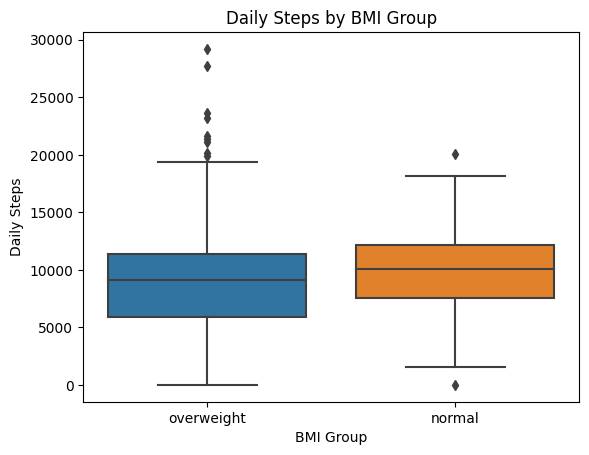

In [158]:
sns.boxplot(
    data=bmi_daily_steps,
    x="body_type",
    y="Steps"
).set(
    title="Daily Steps by BMI Group",
    xlabel="BMI Group",
    ylabel="Daily Steps"
)
plt.show()


**TODO:**

* change `body_type` to `bmi_group`
* order group from lighest to heaviest
* add another filter to sort if weekday or weekend

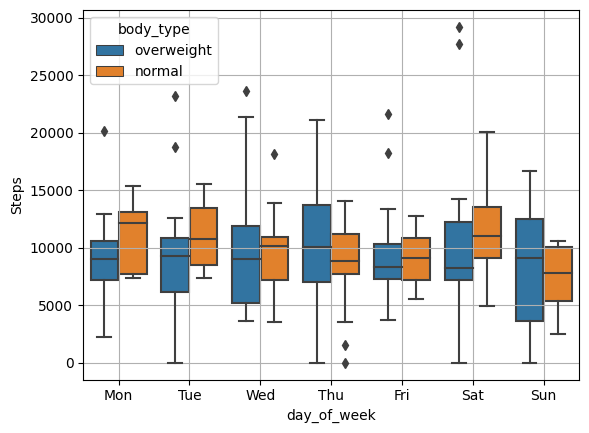

In [165]:
sns.boxplot(
    data=bmi_daily_steps,
    x='day_of_week',
    y='Steps',
    hue='body_type'
)